<a href="https://colab.research.google.com/github/itsShashankDev/Blog-website/blob/master/Exp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 40, Error: 1.0843838818575173


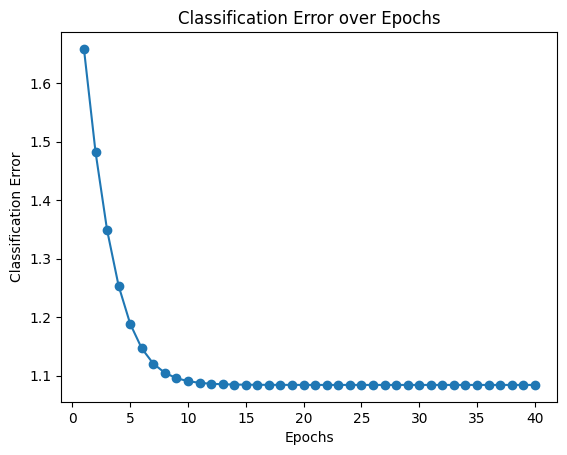

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred)) / len(y_true)


def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]


np.random.seed(42)
num_samples = 100
num_features = 2
num_classes = 3
X = np.random.randn(num_samples, num_features)
true_labels = np.random.randint(0, num_classes, size=num_samples)
Y = one_hot_encode(true_labels, num_classes)

weights = np.random.randn(num_features, num_classes)
biases = np.zeros((1, num_classes))
learning_rate = 0.01
num_epochs = 40
errors = []
for epoch in range(num_epochs):
    logits = np.dot(X, weights) + biases
    predictions = softmax(logits)
    loss = cross_entropy_loss(Y, predictions)
    errors.append(loss)
    gradient = predictions - Y
    d_weights = np.dot(X.T, gradient)
    d_biases = np.sum(gradient, axis=0, keepdims=True)
    weights -= learning_rate * d_weights
    biases -= learning_rate * d_biases


print(f"Epoch {epoch + 1}, Error: {loss}")
plt.plot(range(1, num_epochs + 1), errors, marker='o')
plt.title('Classification Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Classification Error')
plt.show()